In [40]:
pip install seaborn 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


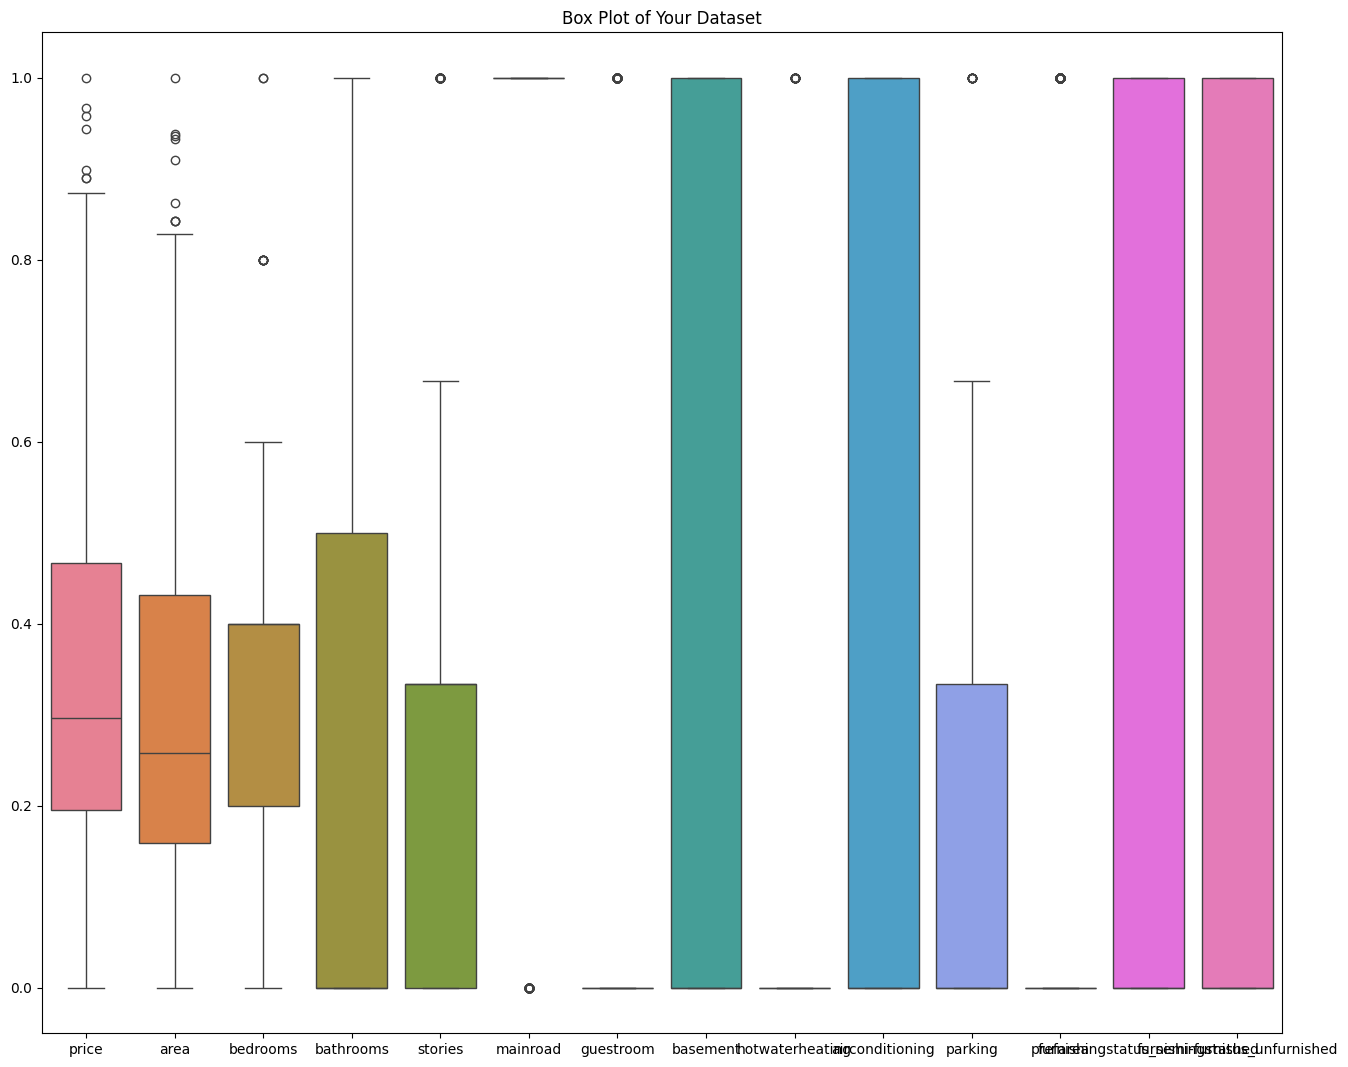

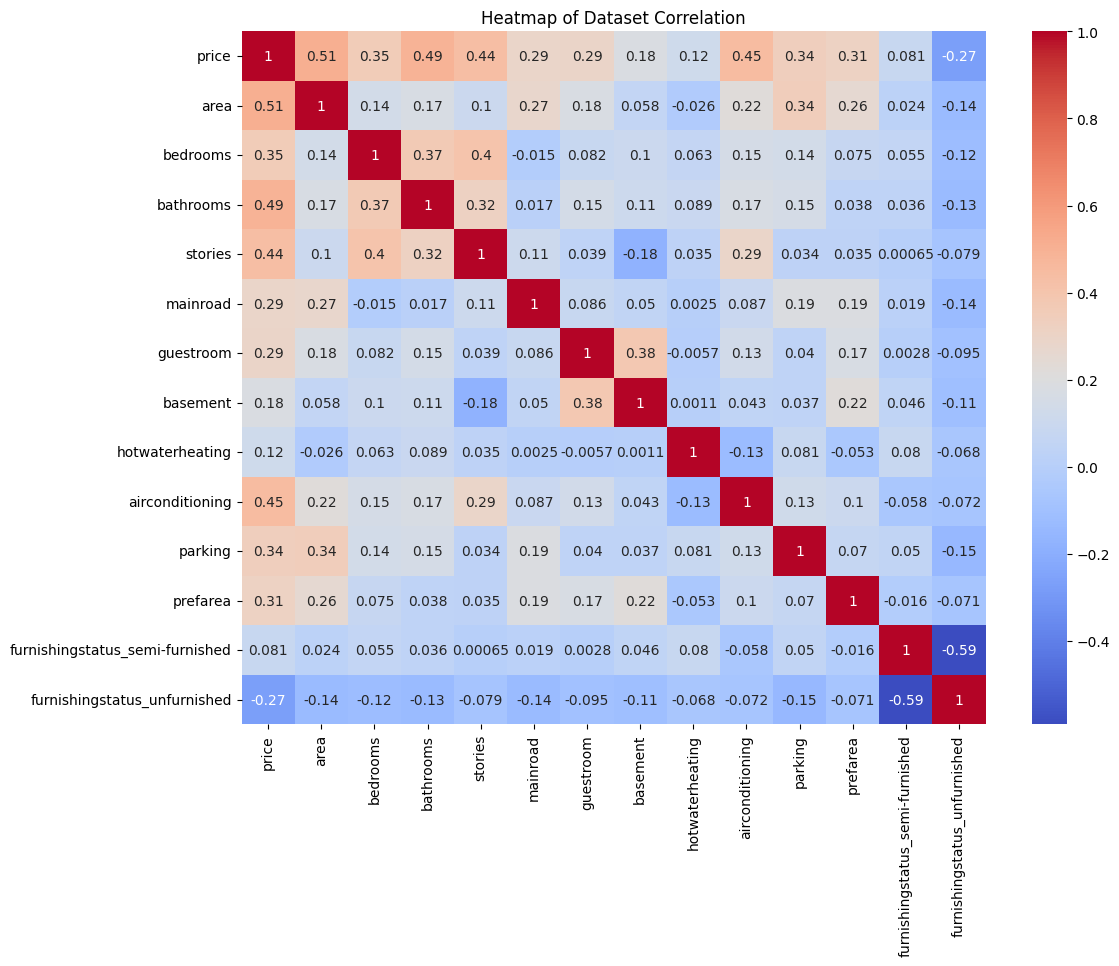

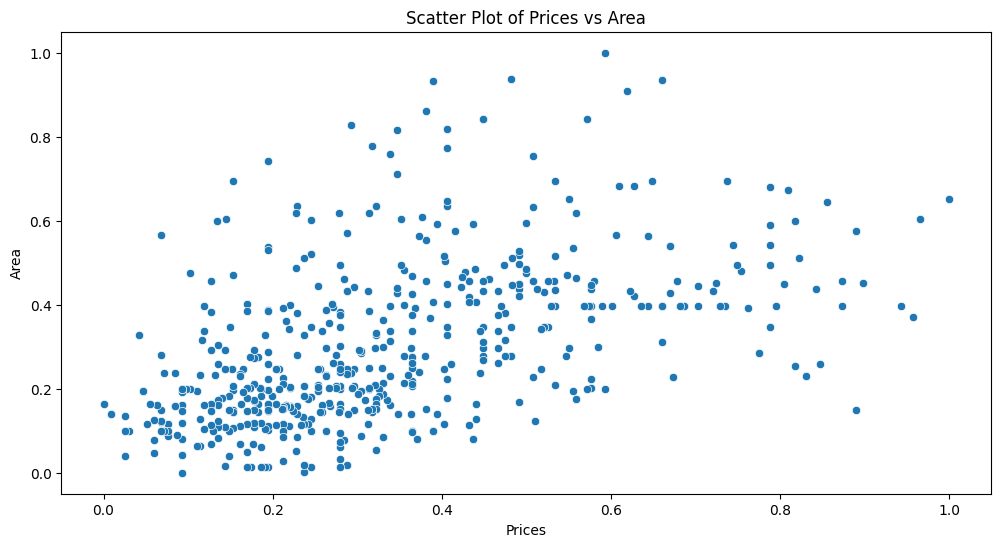

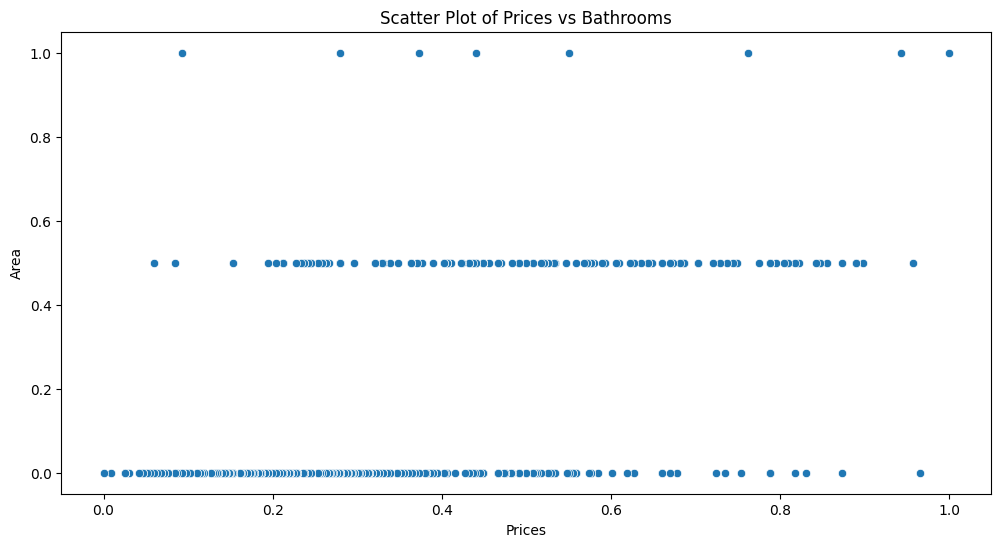

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

house_df = pd.read_csv('cleaned_house.csv')


plt.figure(figsize=(16, 13))
sns.boxplot(data=house_df)
plt.title('Box Plot of Your Dataset')
plt.show()

# Example 2: Heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Dataset Correlation')
plt.show()

# Example 3: Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='area', data=house_df)
plt.title('Scatter Plot of Prices vs Area')
plt.xlabel('Prices')
plt.ylabel('Area')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='bathrooms', data=house_df)
plt.title('Scatter Plot of Prices vs Bathrooms')
plt.xlabel('Prices')
plt.ylabel('Area')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

def linear_regression_model(df, target_column, feature_columns):
    X = df[feature_columns]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return model, mse 


target_column = 'price'
feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']

model, mse = linear_regression_model(house_df, target_column, feature_columns)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.012649089903300917


In [44]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

def elbow_method(df):
    """ 
    Function to implement the elbow method so that we can determine how many clusters we need 
    parameters: 
    df: the dataset we need for clustering 
    returns:
    plots the elbow method graph 
    """
    wcss = []
    for i in range(1, 20):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,20), wcss)
    plt.title('Elbow Method Graph')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show() 


In [45]:
def kmeans_clustering(df, n_clusters):
    """ 
    Function to perform KMeans clustering 
    Parameters: 
    df = dataset we need for clustering 
    kmeans_model: the trained kmeans model
    """
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    df['cluster'] = kmeans.labels_

    return df, kmeans 

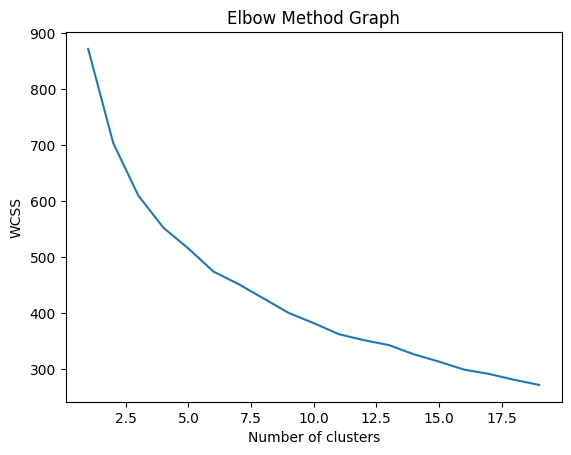

In [46]:
df_features = house_df.drop(columns=['price'])
# We drop the price column because it is the target variable and when clustering we don't require the target variabel 

elbow_method(df_features)

In [47]:
n_clusters = 6 
clustered_df, kmeans_model = kmeans_clustering(df_features, n_clusters)
clustered_df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,cluster
0,0.652131,0.6,1.0,1.000000,1,0,0,0,1,0.666667,1,True,False,2
1,0.604559,0.6,0.0,0.333333,1,1,1,0,1,0.666667,1,False,False,5
2,0.371655,0.4,0.5,1.000000,1,1,0,0,1,0.333333,1,False,True,2
3,0.396432,0.6,1.0,0.333333,1,1,1,1,0,0.666667,0,True,False,4
4,0.450942,0.6,0.5,0.333333,1,0,0,0,1,0.333333,1,True,False,2


In [48]:
print("\nCluster Centers:")
print(kmeans_model.cluster_centers_)


Cluster Centers:
[[ 1.26000503 -0.13749655 -0.31859393 -0.50400985  0.28924474 -0.42921128
  -0.31346419 -0.21490635  0.20210209  1.1378763   0.12172883  0.26180152
  -0.57525834]
 [-0.48611992 -0.42154555 -0.48530638 -0.42901071 -0.37191738 -0.43677329
  -0.41266946 -0.17857727 -0.35995047 -0.39706483 -0.35911261 -0.85829288
   1.25795866]
 [ 0.62812309  0.68393918  1.18224885  1.69739347  0.31251654  0.02626641
  -0.49288062  0.12315587  0.93145266  0.41139906 -0.02820195 -0.29623834
  -0.15501544]
 [-0.61225362 -0.04607721 -0.17062866 -0.02604969 -0.06999519 -0.45894592
  -0.07436553  0.18563319 -0.32705365 -0.26429301 -0.22415579  0.75530167
  -0.68987005]
 [ 0.16083764  0.02664272  0.36623118 -0.33433647 -0.00588393  2.10406353
   1.04183156  0.22764783  0.0031883  -0.05090464 -0.55295968  0.15340529
  -0.20363859]
 [ 0.68445862  0.36931945  0.1507992  -0.3100647   0.39396782  1.06327949
   1.30260126 -0.21490635  0.37517974  0.06777162  1.80845011 -0.07733289
  -0.1268652 ]]
